In [1]:
import tweepy 
import textblob
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re 
import csv

In [2]:
class Bot: 
    def __init__(self,path_to_login,):
        self.path_to_login = path_to_login
    
    # Get tokens
    def getTokens(self):
        credentials =[]
        with open(self.path_to_login, 'r') as file:
            csvreader = csv.reader(file)
            for row in csvreader:
                credentials.append(row)
        # Don't return headers
        return credentials[1]
    
    def authentication(self): 
        tokens = getTokens()
        consumerKey = tokens[0]
        consumerSecret = tokens[1]
        accessToken = tokens[2]
        accessTokenSecret = tokens[3]
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        
       
bot = Bot('../login.csv')


In [3]:
# Get tokens
def getTokens():
    credentials =[]
    with open("../login.csv", 'r') as file:
        csvreader = csv.reader(file)
        for row in csvreader:
            credentials.append(row)
    # Don't return headers
    return credentials[1]

In [4]:
tokens = getTokens()
consumerKey = tokens[0]
consumerSecret = tokens[1]
accessToken = tokens[2]
accessTokenSecret = tokens[3]

FileNotFoundError: [Errno 2] No such file or directory: '../login.csv'

In [ ]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
crypto_currency = 'Bitcoin'
search = f'{crypto_currency} -filter:retweets'
start = "2022-01-01"
end = "2022-03-01"

In [ ]:
cursor = tweepy.Cursor(api.search_tweets,q=search, lang='en',until=end,tweet_mode='extended').items(100)

In [ ]:
tweets = [tweet.full_text for tweet in cursor]
tweets_df = pd.DataFrame(tweets, columns=['Tweets'])

In [ ]:
for _, row in tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+','',row['Tweets'])
    row['Tweets'] = re.sub('#\S+','',row['Tweets'])
    row['Tweets'] = re.sub('@\S+','',row['Tweets'])
    row['Tweets'] = re.sub('\\n','',row['Tweets']) 

In [ ]:
tweets_df['Polarity'] = tweets_df['Tweets'].map(lambda tweet:textblob.TextBlob(tweet).sentiment.polarity)
print(tweets_df['Polarity'])
tweets_df['Result'] = tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else ('-' if pol < 0 else '='))

Series([], Name: Polarity, dtype: object)


In [ ]:
positive = tweets_df[tweets_df.Result == '+'].count()['Tweets']
negative = tweets_df[tweets_df.Result == '-'].count()['Tweets']
neutral = tweets_df[tweets_df.Result == '='].count()['Tweets']

print(f'Positive: {positive}, Negative: {negative}, Neutral: {neutral}')

Positive: 0, Negative: 0, Neutral: 0


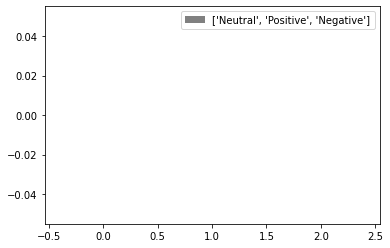

In [ ]:
plt.bar([0,1,2], [neutral,positive, negative], label=['Neutral','Positive', 'Negative'], color=['grey', 'green', 'red'])
plt.legend()
plt.show()

In [ ]:
if __name__ == '__main__':
    bot = Bot('../login.csv') 